In [1]:
#importing standard libraries.  More esoteric libraries
#will be imported down below as needed

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import re

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

from nltk.corpus import stopwords

In [3]:
#import data set as dataframe and use smaller subset
#for simple modeling purposes
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:20000]
#df_quick


In [4]:
#using regexp notation to get rid of numbers in reviews
df_new = df_quick.copy()
df_new["Review"] = df_new["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
df_new.Review[0]
# r"\d+"

' Manakamana doesn t answer any questions  yet makes its point  Nepal  like the rest of our planet  is a picturesque but far from peaceable kingdom '

In [5]:
#create a model to make a word counts matrix from the docs
#This model will lowercase words, stip accents, take out english stop words, and 
# take out obscure words, and possibly words that appear to often

count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,1),
                             max_features=3000)
X_train_counts = count_vect.fit_transform(df_quick.Review.values)

In [6]:
# These are the words in our vocabulary to serve as 
# feature names
feature_names = count_vect.get_feature_names()
feature_names

['10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '20',
 '2010',
 '2015',
 '21st',
 '30',
 '3d',
 '40',
 '45',
 '50',
 '70s',
 '80s',
 '90',
 '90s',
 'abandon',
 'ability',
 'able',
 'absent',
 'absolute',
 'absolutely',
 'absorbing',
 'absurd',
 'abuse',
 'accessible',
 'accomplished',
 'account',
 'accurate',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'act',
 'acted',
 'acting',
 'action',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adaptation',
 'adaptations',
 'add',
 'addition',
 'adds',
 'adequate',
 'admirable',
 'admire',
 'admit',
 'adolescence',
 'adolescent',
 'adult',
 'adults',
 'adventure',
 'adventures',
 'aesthetic',
 'affair',
 'affecting',
 'affection',
 'affleck',
 'afraid',
 'african',
 'age',
 'agenda',
 'agent',
 'ages',
 'aggressively',
 'ago',
 'ahead',
 'aimed',
 'aims',
 'ain',
 'air',
 'al',
 'alas',
 'albeit',
 'alice',
 'alien',
 'aliens',
 'alike',
 'alive',
 'allegory',
 'allen',
 'allow',
 'allow

In [6]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

10                   0
100                  1
11                   2
12                   3
13                   4
15                   5
20                   6
2010                 7
2015                 8
21st                 9
30                   10
3d                   11
40                   12
45                   13
50                   14
70s                  15
80s                  16
90                   17
90s                  18
abandon              19
ability              20
able                 21
absent               22
absolute             23
absolutely           24
absorbing            25
absurd               26
abuse                27
accessible           28
accomplished         29
account              30
accurate             31
achieve              32
achieved             33
achievement          34
achieves             35
act                  36
acted                37
acting               38
action               39
activity             40
actor                41
ac

places               1955
plain                1956
plan                 1957
planet               1958
play                 1959
played               1960
players              1961
playful              1962
playing              1963
plays                1964
pleasant             1965
pleasing             1966
pleasure             1967
pleasures            1968
plenty               1969
plodding             1970
plot                 1971
plotted              1972
plotting             1973
plus                 1974
poetic               1975
poetry               1976
poignant             1977
point                1978
pointless            1979
points               1980
polanski             1981
police               1982
polish               1983
polished             1984
political            1985
politics             1986
poor                 1987
poorly               1988
pop                  1989
popcorn              1990
popping              1991
popular              1992
porn        

In [7]:
count_vect.vocabulary_.keys()

dict_keys(['doesn', 'answer', 'questions', 'makes', 'point', 'like', 'rest', 'planet', 'far', 'kingdom', 'offensive', 'good', 'clean', 'fun', 'difficult', 'imagine', 'material', 'wrong', 'lost', 'despite', 'gusto', 'star', 'brings', 'role', 'hard', 'ride', 'discovery', 'idea', 'core', 'film', 'buried', 'jokes', 'dog', 'bad', 'ridiculous', 'plot', 'goes', 'channel', 'intermittently', 'curious', 'entry', 'time', 'travel', 'satire', 'dark', 'hell', 'absurd', 'surely', 'close', 'reality', 'era', 'deserves', 'better', 'movie', 'actor', 'embrace', 'season', 'slight', 'bell', 'debut', 'feature', 'subject', 'humor', 'intelligence', 'issue', 'performance', 'shamelessly', 'music', 'score', 'director', 'halloween', 'achieves', 'considerable', 'power', 'entirely', 'visual', 'means', 'people', 'action', 'thrills', 'son', 'filmmaking', 'turn', 'doing', 'cinema', 'does', 'best', 'hands', 'great', 'filmmakers', 'showing', 'telling', 'isn', 'thrilling', 'fox', 'act', 'funny', 'lovely', 'watch', 'need',

In [8]:
#check to see if I can look up a word from count vect
# matrix which is in a particular document. Yes!
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key]==2323:
        print(key)


sequels


In [9]:
# stop words currently in "english". Could add to this 
# list later.
count_vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [10]:
#Convert from sparse array to numpy array
X_train_counts
X_train_counts_arr = X_train_counts.toarray()
type(X_train_counts_arr[0][0])

numpy.int64

In [11]:
# getting indices of features in matrix for doc1
type(X_train_counts_arr)
ind = X_train_counts[0].nonzero()
ind[1]

array([1486,  982, 1958, 2182, 1564, 1978, 1640, 2087,  122,  755],
      dtype=int32)

In [12]:
# showing words in doc 1 that are represented in counts matrix
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key] in ind[1]:
        print(key)

doesn
answer
questions
makes
point
like
rest
planet
far
kingdom


 do I want to stem or lemmatize?
 much adieu about nothing!!!  However, I do want to take out the numbers...they are driving me crazy....regex to the rescue. Also, why doesn't peace show up in doc 1?

In [13]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
# 1. Create a set of documents.
#corpus = [' '.join(df_quick['Review']).lower() for row in df_quick]
#print(corpus)

In [16]:
df_corpus = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
bag_of_words = " ".join(df_corpus)
bag_of_words.lower()
df_corpus =df_corpus.str.lower()

In [17]:
# 2. Create a set of tokenized documents.
docs_tokenized = [word_tokenize(content) for content in df_corpus]
#docs_tokenized


In [18]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs_stop = [[word for word in words if word not in stop] for words in docs_tokenized]
#docs_stop

In [19]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs_stop]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_stop]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs_stop]
#docs_wordnet


In [20]:
docs_wordnet
new_element =[]
for element in docs_wordnet:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series = pd.Series(new_element)
new_series
col = "text"
new_df = pd.DataFrame(new_series,columns = [col])
new_df.head()

,text
0,manakamana answer question yet make point nepa...
1,wilfully offensive powered chest thumping mach...
2,would difficult imagine material wrong spade l...
3,despite gusto star brings role hard ride shotg...
4,good idea core film buried unsightly pile flat...


Now, I have a dataframe with a really good stemmed and cleaned text. Let's get the official countvectorized matrix and take a look at it.

In [21]:
cv = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words="english",
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,1),
                             max_features=3000)
X_train_counts_final = cv.fit_transform(new_df.text.values)
X_train_counts_final
X_train_counts_final_arr = X_train_counts_final.toarray()
X_train_counts_final_arr.shape

(20000, 3000)

In [22]:
stop_words = set(stopwords.words('english'))
stop_words
#new_stopwords = set(["film","movie","like","feel","time","little","adject", "adds",
#                   "bestloved","agonizingly","bantamweight"])
#new_stopwords
#stop_words.update(new_stopwords)
for word in stop_words:
    print(word)



other
itself
between
all
she
ve
before
needn
her
through
below
own
couldn
don
ourselves
during
does
you're
why
should've
y
mightn
haven't
isn't
so
wasn
this
again
but
each
into
couldn't
aren
nor
how
your
mightn't
mustn't
be
up
any
no
been
out
under
here
my
you'd
ll
hasn
most
don't
wasn't
them
mustn
having
their
they
being
it's
ain
by
did
further
only
yourselves
its
am
too
hadn't
just
his
over
once
for
shan't
shouldn't
weren
she's
then
t
above
won
in
needn't
o
do
very
as
are
whom
after
few
of
from
him
d
those
hadn
isn
himself
doesn
now
when
he
because
on
didn
same
that'll
were
myself
should
shan
s
aren't
that
until
it
some
the
haven
which
doing
didn't
or
i
ours
m
won't
hasn't
such
weren't
themselves
if
where
can
you
there
these
herself
me
re
you'll
off
has
than
wouldn
you've
what
wouldn't
to
yours
theirs
hers
will
shouldn
yourself
both
with
doesn't
and
is
about
at
down
a
against
our
an
not
ma
had
we
while
more
have
who
was


In [23]:
feature_names2 = cv.get_feature_names()
#feature_names2

In [24]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(cv.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, cv.vocabulary_[key]))

abandon              0
ability              1
able                 2
absence              3
absent               4
absolute             5
absolutely           6
absorbing            7
absurd               8
absurdity            9
abuse                10
academy              11
accent               12
accessible           13
accomplished         14
accomplishment       15
account              16
accurate             17
achieve              18
achieved             19
achievement          20
achieves             21
act                  22
acted                23
acting               24
action               25
actioner             26
activity             27
actor                28
actress              29
actual               30
actually             31
ad                   32
adam                 33
adaptation           34
add                  35
added                36
adding               37
addition             38
address              39
adequate             40
admirable            41
ad

reitman              2149
relatable            2150
relationship         2151
relatively           2152
release              2153
released             2154
relentless           2155
relentlessly         2156
relevance            2157
relevant             2158
relief               2159
relies               2160
religion             2161
religious            2162
rely                 2163
remain               2164
remains              2165
remake               2166
remarkable           2167
remarkably           2168
remember             2169
remind               2170
reminder             2171
reminds              2172
reminiscent          2173
rendered             2174
rent                 2175
repetitive           2176
represents           2177
required             2178
requires             2179
rescue               2180
resembles            2181
resist               2182
resolution           2183
resonance            2184
resonant             2185
resonate             2186
respect     

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf_arr = X_train_tfidf.toarray()

In [27]:
type(X_train_tfidf_arr)

numpy.ndarray

In [28]:
from collections import Counter, defaultdict

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

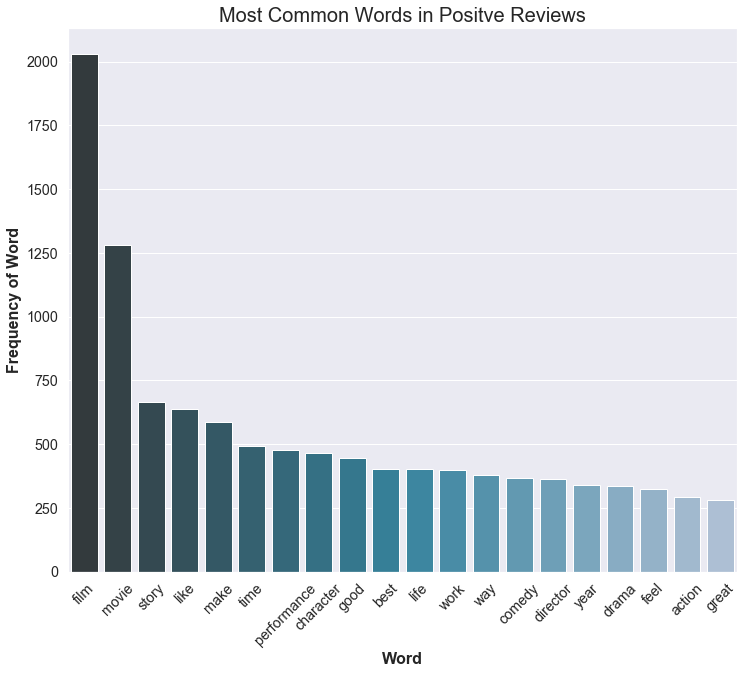

In [29]:
df_pos = new_df[df_quick["Freshness"]==1]
df_pos
X_train_counts_pos = cv.transform(df_pos["text"].values)
word_freq_pos = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_pos.sum(axis=0)).ravel()))
word_counter_pos = Counter(word_freq_pos)
word_counter_df_pos = pd.DataFrame(word_counter_pos.most_common(20), columns = ['word', 'freq'])
df_neg = new_df[df_quick["Freshness"]==0]
X_train_counts_neg = cv.transform(df_neg["text"].values)
word_freq_neg = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_neg.sum(axis=0)).ravel()))
word_counter_neg = Counter(word_freq_neg)
word_counter_df_neg = pd.DataFrame(word_counter_neg.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_pos, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in Positve Reviews",fontsize=20)
plt.savefig("images/most_common_words_pos")
plt.show();

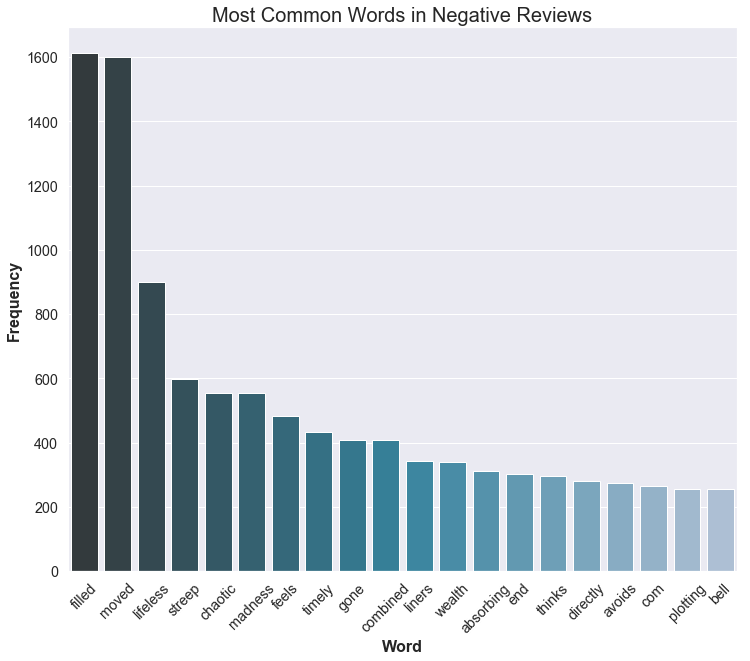

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_neg")
plt.show();

In [31]:
from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

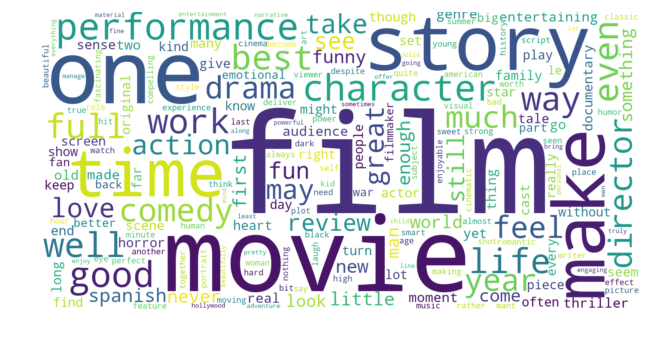

In [71]:
df_pos.head()
temp = df_pos["text"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(width=1600, height=800, collocations=False, stopwords=stopwords,background_color="white").generate(text)
fig = plt.figure(figsize = (9,6),facecolor="w")
plt.axis("off")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
#plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud3.png",facecolor="w")
plt.show()

In [33]:
text

'manakamana answer question yet make point nepal like rest planet picturesque far peaceable kingdom wilfully offensive powered chest thumping machismo good clean fun height satire dark hell patently absurd surely nowhere close objective reality objective reality surpassed somewhere jerry springer era slight contained ineffably soulful bell debut feature address subject humor intelligence approaching issue performance enhancement every conceivable angle except shamelessly irresistibly zingy music score director halloween achieves considerable power almost entirely visual mean son saul employ formal mechanic filmmaking turn question back around cinema best hand great filmmaker showing showing telling telling yossi stronger film predecessor deeply felt le reliant love story convention feel like sparkle baby puked rainbow colored dust head kubo two string better immersive absorptive pulled knight direction become part studio technical wizardry extraordinary blast past x men first class go 

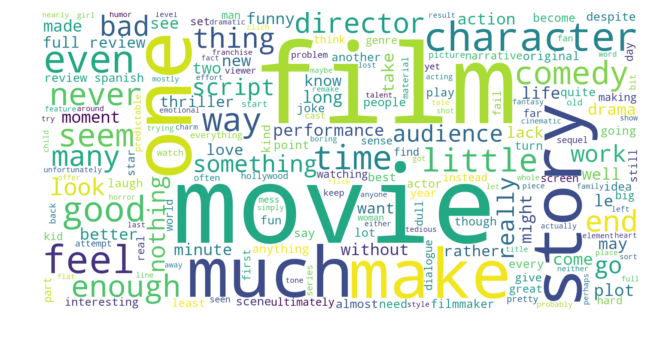

In [34]:
df_neg.head()
temp = df_neg["text"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(width=1600, height=800, stopwords=stopwords,background_color="white").generate(text)
fig = plt.figure(figsize = (9,6),facecolor="w")
plt.axis("off")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
#plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud4.png",facecolor="w")
plt.show()

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
# print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
y=df_quick["Freshness"].values
nb_model.fit(X_train_tfidf_arr, y)
type(X_train_tfidf_arr)

numpy.ndarray

In [79]:
ind_max = nb_model.feature_log_prob_.argsort()[::-1]
ind_max
ind_top = ind_max[:,:100]
ind_top.shape
feature_names = np.array(cv.get_feature_names())
feature_names_neg= feature_names[ind_top[0]]
feature_names_neg
feature_names_pos= feature_names[ind_top[1]]
feature_names_pos

array(['improvement', 'talent', 'wrapped', 'implausible', 'suggests',
       'delightfully', 'deliberately', 'reduced', 'expectation',
       'ingredient', 'straightforward', 'david', 'earnest', 'basic',
       'awareness', 'explores', 'wreck', 'climax', 'loses', 'australian',
       'anderson', 'title', 'hated', 'revealed', 'throat', 'undeniably',
       'rescue', 'silly', 'arthur', 'coogan', 'experiment', 'intriguing',
       'reveal', 'shakespeare', 'poorly', 'raising', 'artificial',
       'generated', 'rendered', 'behold', 'citizen', 'translation',
       'blown', 'hearted', 'gaze', 'director', 'graceful', 'actor',
       'express', 'played', 'menace', 'eat', 'wolverine', 'british',
       'hardy', 'shaky', 'intimacy', 'ingenious', 'provide', 'determined',
       'dreamworks', 'undone', 'horrible', 'trilogy', 'glory', 'perfect',
       'red', 'main', 'speed', 'grows', 'unique', 'engrossing',
       'interview', 'intimate', 'innocent', 'brilliantly', 'authentic',
       'technical'

In [36]:
df_test = df[40000:42500]
y_test = df_test["Freshness"].values
X_test = df_test["Review"].values
df_corpus_test = df_test["Review"].str.replace(r'([^a-zA-Z\s]+?)'," ")
bag_of_words = " ".join(df_corpus)
df_corpus_test =df_corpus_test.str.lower()
docs_tokenized_test = [word_tokenize(content) for content in df_corpus_test]
docs_stop_test = [[word for word in words if word not in stop] for words in docs_tokenized_test]
docs_wordnet_test = [[wordnet.lemmatize(word) for word in words] for words in docs_stop_test]
docs_wordnet_test

[['exultant', 'comedy', 'american', 'repression', 'revolt'],
 ['moving', 'term', 'invigorating', 'conversation', 'starter'],
 ['bullett',
  'raja',
  'director',
  'tigmanshu',
  'dhulia',
  'commercial',
  'film',
  'yet',
  'weakest'],
 ['infinitely',
  'polar',
  'bear',
  'vivid',
  'snapshot',
  'one',
  'family',
  'surviving',
  'state',
  'chaotic',
  'affectionate',
  'imperfection',
  'time',
  'kid',
  'raising',
  'seen',
  'neglect',
  'normal'],
 ['disney',
  'pixar',
  'animation',
  'quality',
  'especially',
  'appearance',
  'human',
  'lively',
  'fantasy',
  'pack',
  'enough',
  'tropical',
  'incident',
  'vivid',
  'action',
  'pas',
  'muster'],
 ['de', 'bont', 'simply', 'reprises', 'first', 'film'],
 ['least',
  'cinematic',
  'train',
  'look',
  'pretty',
  'run',
  'track',
  'driving',
  'home',
  'symbolism',
  'people',
  'theater',
  'full',
  'content',
  'review',
  'parent',
  'violence',
  'profanity',
  'nudity',
  'etc',
  'also',
  'available'],
 

In [80]:
text_neg =""
for i, word in enumerate(feature_names_neg):
    text_neg += (word + " ")*(100-i)
text_pos =""
for i, word in enumerate(feature_names_pos):
    text_pos += (word + " ")*(100-i)
text_neg


'check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check check unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected unexpected une

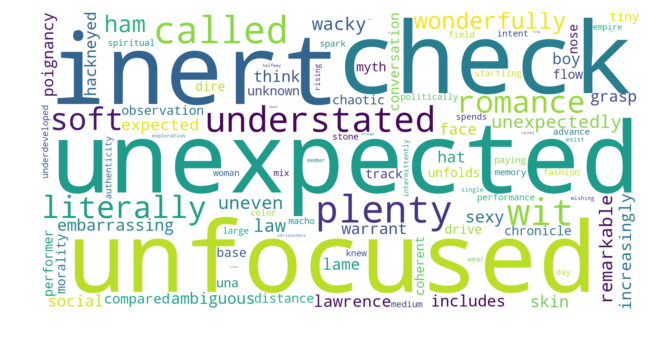

In [84]:
stopwords = set(STOPWORDS)
wordcloud =WordCloud(width=1600, height=800, collocations=False, stopwords=stopwords,background_color="white").generate(text_neg)
fig = plt.figure(figsize = (9,6),facecolor="w")
plt.axis("off")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
#plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/neg_prob.png",facecolor="w")
plt.show()

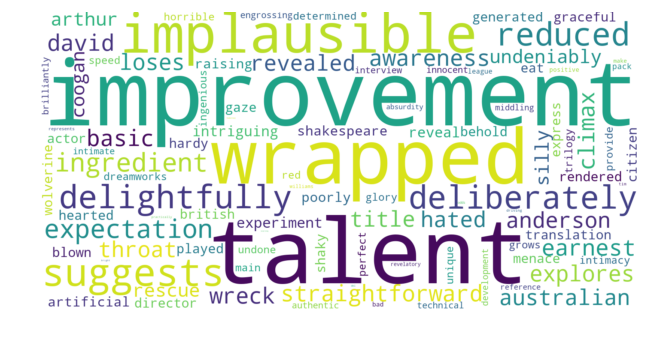

In [83]:
stopwords = set(STOPWORDS)
wordcloud =WordCloud(width=1600, height=800, collocations=False, stopwords=stopwords,background_color="white").generate(text_pos)
fig = plt.figure(figsize = (9,6),facecolor="w")
plt.axis("off")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
#plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/pos_prob.png",facecolor="w")
plt.show()

In [37]:
new_element =[]
for element in docs_wordnet_test:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series_test = pd.Series(new_element)
new_series_test
col = "text"
new_df_test = pd.DataFrame(new_series_test,columns = [col])
new_df_test

,text
0,exultant comedy american repression revolt
1,moving term invigorating conversation starter
2,bullett raja director tigmanshu dhulia commerc...
3,infinitely polar bear vivid snapshot one famil...
4,disney pixar animation quality especially appe...
5,de bont simply reprises first film
6,least cinematic train look pretty run track dr...
7,performance make material human accessible mai...
8,filmmaker possessed mutation travel back time ...
9,helen mirren commanding performance elizabeth ...


In [38]:
X_test_counts = cv.transform(df_test.Review.values)
#X_test_counts_arr = X_test_counts.toarray()
#X_test_counts_arr
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_arr = X_test_tfidf.toarray()
# #print(X_test_arr.shape)
# #X_test_std= scaler.fit_transform(X_temp)
# y_test = new_df_test["Freshness"].values
# #print(X_test_counts.shape)
# print(X_test_arr.shape)
nb_model.score(X_train_tfidf_arr,y)

0.802

In [39]:
nb_model.score(X_test_arr, y_test)

0.5088

In [40]:
ans = nb_model.predict_proba(X_test_arr)
ans

array([[0.68559888, 0.31440112],
       [0.37250548, 0.62749452],
       [0.6513252 , 0.3486748 ],
       ...,
       [0.51082935, 0.48917065],
       [0.2991303 , 0.7008697 ],
       [0.35966766, 0.64033234]])

In [41]:
y_predict = nb_model.predict(X_test_arr)
y_predict

array([0, 1, 0, ..., 0, 1, 1])

In [42]:
sum(y_predict)

1175

In [43]:
from sklearn import metrics

In [44]:
metrics.confusion_matrix(y_test, y_predict)

array([[692, 595],
       [633, 580]])

In [45]:
#false positives
false_positives = new_df_test[y_predict > y_test]
false_positives

,text
6,least cinematic train look pretty run track dr...
11,dark shadow amusing fit spurt sure make ton mo...
25,miss sloane heroine driven craftiness film sub...
34,problem try stuff romantic comedy episodic eve...
35,le fantastic
41,contain exactly two memorable scene rest rockn...
51,marie curie get look right costume creation ea...
69,technically excellent throughout style strong ...
74,overly long superficial shallow closet updated...
78,much movie play like civics lesson


In [46]:
#false negatives
false_neg = new_df_test[y_predict < y_test]
false_neg

,text
0,exultant comedy american repression revolt
3,infinitely polar bear vivid snapshot one famil...
4,disney pixar animation quality especially appe...
9,helen mirren commanding performance elizabeth ...
13,anders danielsen lie give compelling deep etch...
14,actor support translates screen real communion...
18,full insanely grand passion bloodthirsty viole...
19,movie raw ambition spirit literally reinvents ...
20,yes absolutely fun well many many thing go boo...
22,deliberately old fashioned ww adventure shine ...


In [47]:
X_train_counts_fp = cv.transform(false_positives["text"].values)
word_freq_fp = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_fp.sum(axis=0)).ravel()))
word_counter_fp = Counter(word_freq_fp)
word_counter_df_fp = pd.DataFrame(word_counter_fp.most_common(20), columns = ['word', 'freq'])

X_train_counts_fn = cv.transform(false_neg["text"].values)
word_freq_fn = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_fn.sum(axis=0)).ravel()))
word_counter_fn = Counter(word_freq_fn)
word_counter_df_fn = pd.DataFrame(word_counter_fn.most_common(20), columns = ['word', 'freq'])



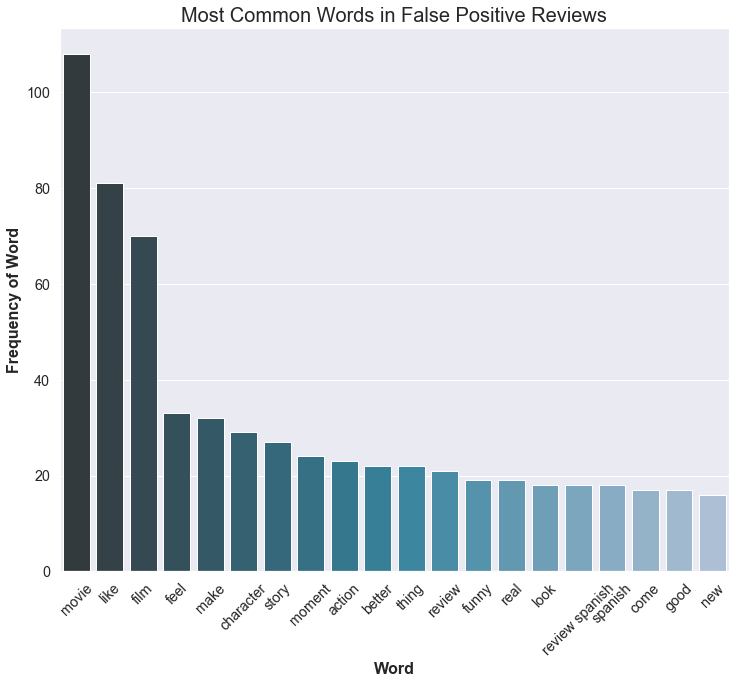

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fp, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in False Positive Reviews",fontsize=20)
plt.savefig("images/most_common_words_fp")
plt.show();

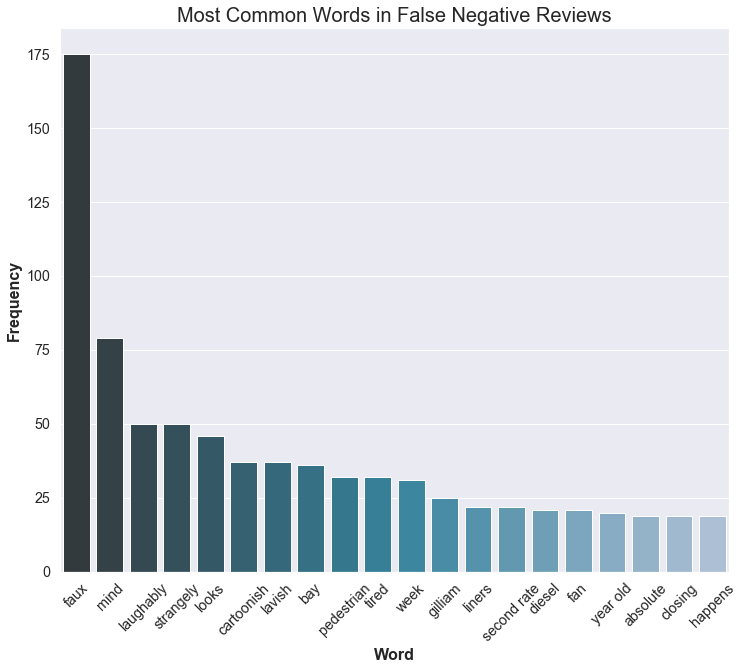

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fn, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in False Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_fn")
plt.show();